In [1]:
!pip install pydataset

import pandas as pd
import matplotlib.pyplot as plt


[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


# Cake

## Daten laden

In [2]:
from pydataset import data
df = data('cake')

initiated datasets repo at: C:\Users\nevio\.pydataset/


In [3]:
data('cake', show_doc=True)

cake

PyDataset Documentation (adopted from R Documentation. The displayed examples are in R)

## Breakage Angle of Chocolate Cakes

### Description

Data on the breakage angle of chocolate cakes made with three different
recipes and baked at six different temperatures. This is a split-plot design
with the recipes being whole-units and the different temperatures being
applied to sub-units (within replicates). The experimental notes suggest that
the replicate numbering represents temporal ordering.

### Format

A data frame with 270 observations on the following 5 variables.

`replicate`

a factor with levels `1` to `15`

`recipe`

a factor with levels `A`, `B` and `C`

`temperature`

an ordered factor with levels `175` < `185` < `195` < `205` < `215` < `225`

`angle`

a numeric vector giving the angle at which the cake broke.

`temp`

numeric value of the baking temperature (degrees F).

### Details

The `replicate` factor is nested within the `recipe` factor, and `temperature`
is nest

## Verteilung & Korrelation

In [4]:
df.describe()

,replicate,temperature,angle,temp
count,270.000000,270.000000,270.000000,270.000000
mean,8.000000,200.000000,32.122222,200.000000
std,4.328517,17.109966,8.212550,17.109966
min,1.000000,175.000000,18.000000,175.000000
25%,4.000000,185.000000,26.000000,185.000000
50%,8.000000,200.000000,31.000000,200.000000
75%,12.000000,215.000000,36.750000,215.000000
max,15.000000,225.000000,63.000000,225.000000


In [5]:
df.corr(numeric_only=True)

,replicate,temperature,angle,temp
replicate,1.000000e+00,-3.127161e-15,-0.544839,-3.127161e-15
temperature,-3.127161e-15,1.000000e+00,0.329242,1.000000e+00
angle,-5.448391e-01,3.292422e-01,1.000000,3.292422e-01
temp,-3.127161e-15,1.000000e+00,0.329242,1.000000e+00


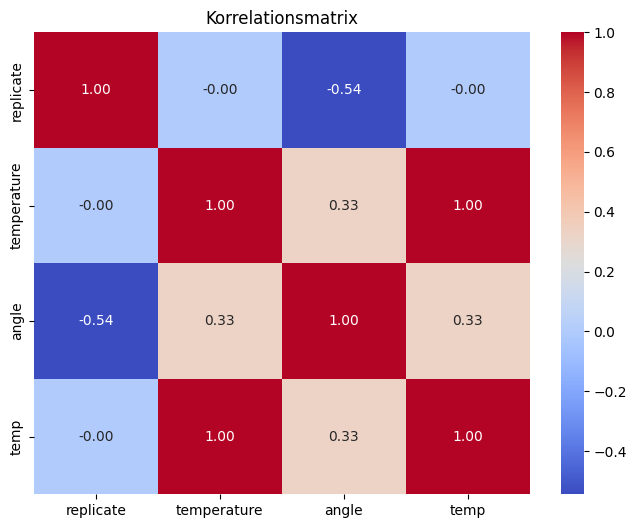

In [6]:
import seaborn as sns

correlation_matrix = df.corr(numeric_only=True)
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Korrelationsmatrix')
plt.show()

## Univariate Plots

(array([21., 53., 73., 52., 29., 15., 19.,  3.,  3.,  2.]),
 array([18. , 22.5, 27. , 31.5, 36. , 40.5, 45. , 49.5, 54. , 58.5, 63. ]),
 <BarContainer object of 10 artists>)

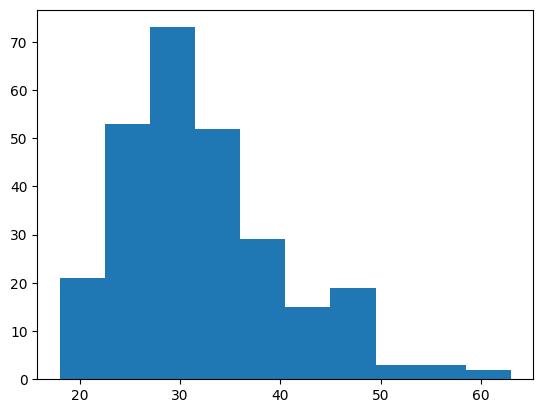

In [7]:
plt.hist(df['angle'])

{'whiskers': [<matplotlib.lines.Line2D at 0x21b10714a50>,
 'caps': [<matplotlib.lines.Line2D at 0x21b10714cd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x21b10714910>],
 'medians': [<matplotlib.lines.Line2D at 0x21b10714f50>],
 'fliers': [<matplotlib.lines.Line2D at 0x21b10715090>],
 'means': []}

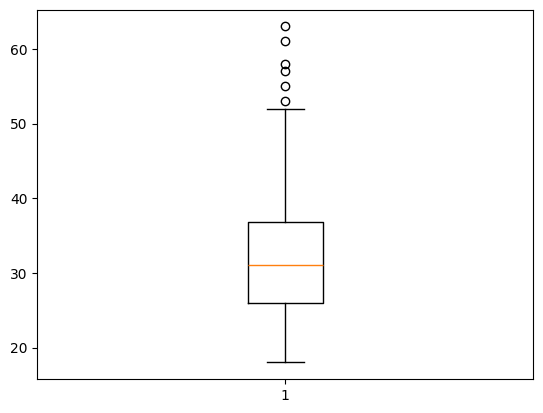

In [8]:
plt.boxplot(df['angle'])

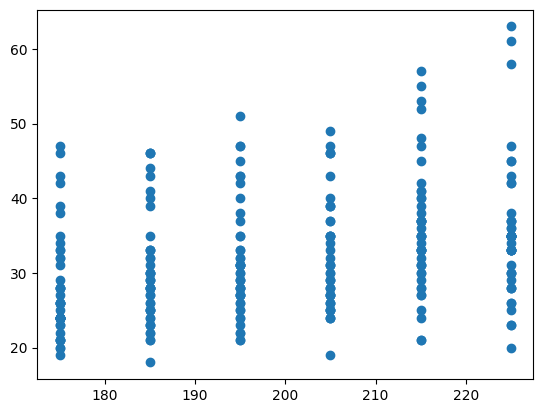

In [9]:
plt.scatter(df['temperature'], df['angle'])

# Titanic

## Daten laden

In [14]:
import seaborn as sns

dataframe = sns.load_dataset('titanic')

## Null values bereinigen

In [11]:
dataframe[dataframe['age'].isnull()]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
17,1,2,male,NaN,0,0,13.0000,S,Second,man,True,NaN,Southampton,yes,True
19,1,3,female,NaN,0,0,7.2250,C,Third,woman,False,NaN,Cherbourg,yes,True
26,0,3,male,NaN,0,0,7.2250,C,Third,man,True,NaN,Cherbourg,no,True
28,1,3,female,NaN,0,0,7.8792,Q,Third,woman,False,NaN,Queenstown,yes,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
859,0,3,male,NaN,0,0,7.2292,C,Third,man,True,NaN,Cherbourg,no,True
863,0,3,female,NaN,8,2,69.5500,S,Third,woman,False,NaN,Southampton,no,False
868,0,3,male,NaN,0,0,9.5000,S,Third,man,True,NaN,Southampton,no,True
878,0,3,male,NaN,0,0,7.8958,S,Third,man,True,NaN,Southampton,no,True


In [12]:
# Variante 1
dataframe.drop('age', axis=1)

,survived,pclass,sex,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [15]:
# Variante 2
dataframe = dataframe[dataframe['age'].notnull()]

## NaN füllen

In [16]:
mean = dataframe['age'].mean()
dataframe['age'].fillna(mean, inplace=True)

C:\Users\nevio\AppData\Local\Temp\ipykernel_28904\4278778435.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataframe['age'].fillna(mean, inplace=True)


## Duplikate anzeigen

In [17]:
dataframe[dataframe.duplicated() == True]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
133,1,2,female,29.00,1,0,26.0000,S,Second,woman,False,NaN,Southampton,yes,False
173,0,3,male,21.00,0,0,7.9250,S,Third,man,True,NaN,Southampton,no,True
213,0,2,male,30.00,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
313,0,3,male,28.00,0,0,7.8958,S,Third,man,True,NaN,Southampton,no,True
320,0,3,male,22.00,0,0,7.2500,S,Third,man,True,NaN,Southampton,no,True
343,0,2,male,25.00,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
355,0,3,male,28.00,0,0,9.5000,S,Third,man,True,NaN,Southampton,no,True
418,0,2,male,30.00,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
476,0,2,male,34.00,1,0,21.0000,S,Second,man,True,NaN,Southampton,no,False
488,0,3,male,30.00,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


## Outliers finden

In [18]:
def find_outliers_IQR(df):
   q1=df.quantile(0.25)
   q3=df.quantile(0.75)
   IQR=q3-q1
   outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]
   return outliers

outliers = find_outliers_IQR(dataframe['age'])
print("number of outliers: "+ str(len(outliers)))

print("max outlier value: "+ str(outliers.max()))

print("min outlier value: "+ str(outliers.min()))

number of outliers: 11
max outlier value: 80.0
min outlier value: 65.0


{'whiskers': [<matplotlib.lines.Line2D at 0x21b108402d0>,
 'caps': [<matplotlib.lines.Line2D at 0x21b10840550>,
 'boxes': [<matplotlib.lines.Line2D at 0x21b10840190>],
 'medians': [<matplotlib.lines.Line2D at 0x21b108407d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x21b10840910>],
 'means': []}

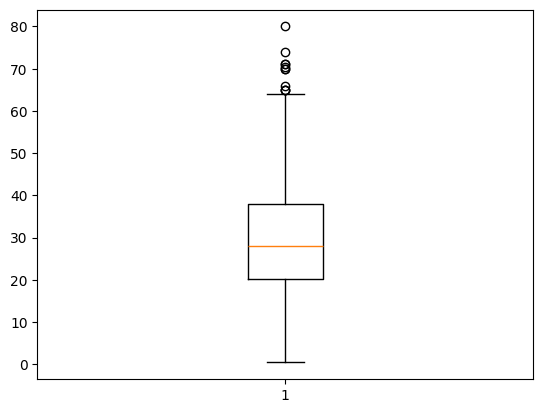

In [19]:
plt.boxplot(dataframe['age'])